# 1: Importing required Libraries

In [213]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import datasets,linear_model
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Importing the Dataset and performing Exploratory Data Analysis (EDA) ON the dataset

In [214]:
# Importing the dataset
patient_data=pd.read_csv('heart.csv')
#target = 'target'
patient_data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [215]:
#Checking the dtypes of all the columns
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [216]:
patient_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


            Target Variable Distribution           


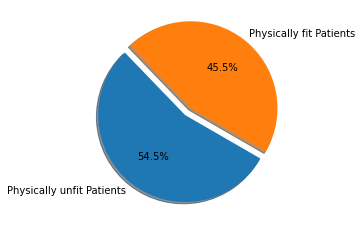

In [217]:
# Converting the target variable to text values
labels = ['Physically fit Patients','Physically unfit Patients']
MAP={}
for e, i in enumerate(sorted(patient_data['output'].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
patient_data1 = patient_data.copy()
patient_data1['output']=patient_data['output'].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(patient_data['output'].value_counts(), labels=patient_data1['output'].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=-30)
plt.show()

In [218]:
# Determine the Categorical and Numeric Values
features=patient_data.drop('output',axis=1)
nu = features.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(features.shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 8 categorical features.


                               Visualising Categorical Features:                                


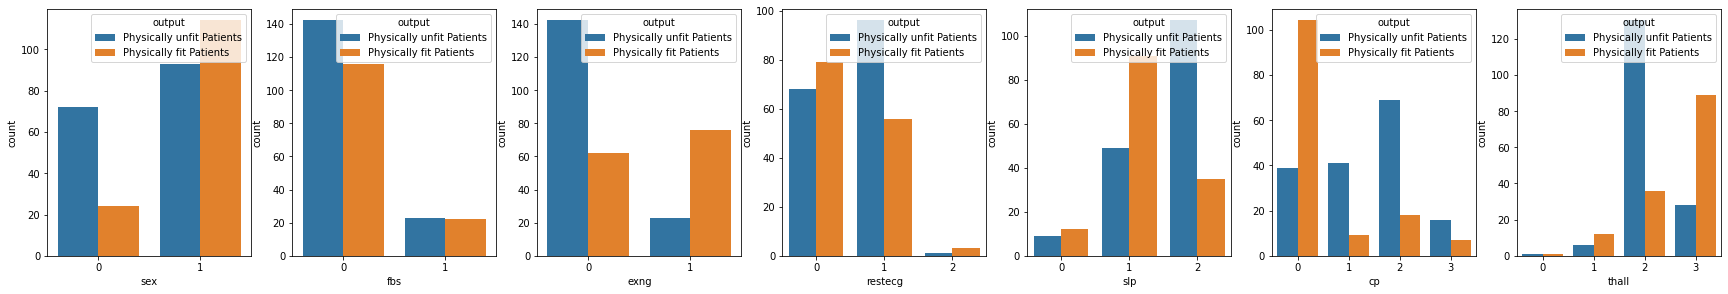

In [219]:
#Visualizing categorical Features
print('\033[1mVisualising Categorical Features:'.center(100))

column_names = list(patient_data[cf])
labels=patient_data1['output'].value_counts().index
#column_names
column_names.pop(-1)
fig = plt.figure(figsize = (30,10))
for i in range(0, len(column_names)):
    #fig.subplots_adjust(hspace=0.2, wspace=0.9)
    ax = fig.add_subplot(2,len(column_names),i+1)
    sns.countplot(x = patient_data[column_names[i]],hue = patient_data1['output'])

Observation from the count plot
Sex: males have a high risk of getting heart disease than the female
Fasting blood sugar:People have no fasting blood suger rate have a high risk of getting heart disease
Chest pain: Chest pain type 0 have the highest number and chest pain type 3  have the lowest number compared to other chest pain types
Exercise induced angina:   People who have no exercise-induced angina pectoris have a very high rate of getting heart disease.
resting electrocardio results: People who have a electro cardio result of 0 have a high risk of getting heart disease
thal: People who have thal value '2' have high risk of getting heart disease

# Data Manipulation,  Feature Selection/Extraction



C:\Users\ayoba\AppData\Local\Temp\ipykernel_21264\3019944846.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(patient_data.corr(), dtype=np.bool)


<AxesSubplot:>

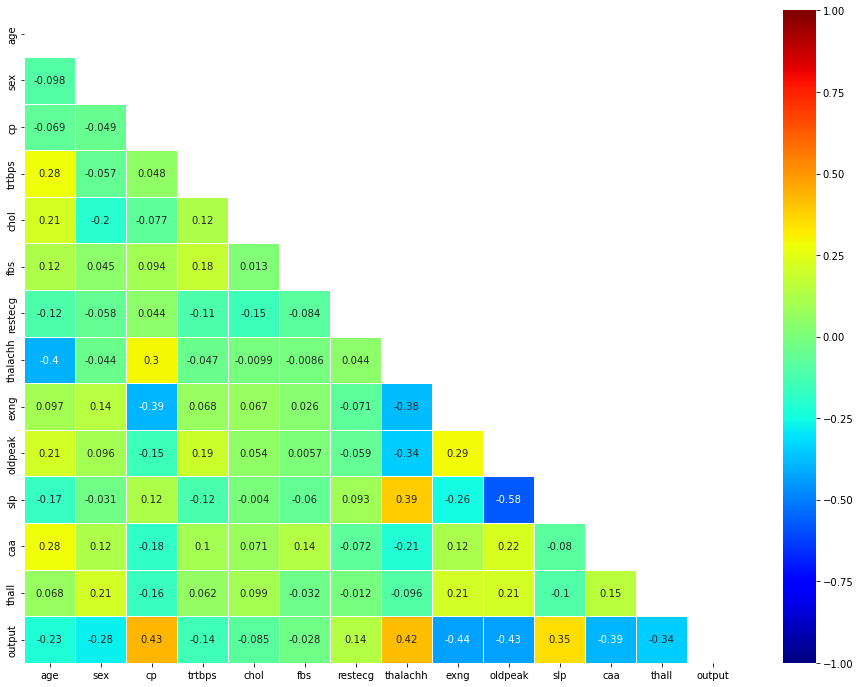

In [220]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(patient_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=patient_data.corr(), cmap="coolwarm", annot=True,linewidths=1, linecolor='white',mask=mask,vmin=-1,vmax=+1)
#sns.heatmap(data1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [221]:
# Separating feature data and Label data
X = patient_data.drop(['output'],axis=1)
y = patient_data['output']

In [223]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)
X_Scalar

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [224]:
#  train-test splitSplit data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Predictictive Modelling

Logistic Modelling

In [225]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [226]:
lreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [227]:
y_pred=lreg.predict(X_test)
y_pred
#pred_prob=lreg.predict_prob(X_test)
LR=np.round(lreg.score(X_train, y_train)*100,2)
LR

86.36

In [228]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [229]:
# Model Accuracy
lr=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print('\n')
print("Error rate:",(1-metrics.accuracy_score(y_test,y_pred))*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 85.24590163934425


Error rate: 14.754098360655743


=== Confusion Matrix ===
[[25  4]
 [ 5 27]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61





Decisoin Tree Classfier

In [230]:
# Fit model on Iris Daatset
from sklearn import tree
DT=tree.DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
y_pred
DTC=np.round(DT.score(X_train, y_train)*100,2)
DTC

100.0

In [231]:
# Decision Tree Model Accuracy
DT=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print('\n')
print("Error rate:",(1-metrics.accuracy_score(y_test,y_pred))*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 83.60655737704919


Error rate: 16.393442622950815


=== Confusion Matrix ===
[[27  2]
 [ 8 24]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61





Random Forest Classifier

In [232]:
from sklearn.ensemble import RandomForestClassifier
# Using Random Forest Classifiersor o
clf=RandomForestClassifier(n_estimators=6)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)
y_pred
RF=np.round(clf.score(X_train, y_train)*100,2)
RF

99.17

Naive Bayes Model

In [233]:
# Import Gausian naive Bayes Model
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [234]:
NB=np.round(gnb.score(X_train, y_train)*100,2)
NB

81.82

In [235]:
# Naive Bayes Model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print('\n')
print("Error rate:",(1-metrics.accuracy_score(y_test,y_pred))*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 86.88524590163934


Error rate: 13.11475409836066


=== Confusion Matrix ===
[[26  3]
 [ 5 27]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61





Support Vector Machine

In [236]:
# call "Support vector classifier"
from sklearn.svm import SVC
svm=SVC(kernel='linear',random_state=1)
svm.fit(X_train,y_train)
svm_predict=svm.predict(X_test)
svm_predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [237]:
SV=np.round(svm.score(X_train, y_train)*100,2)
SV

87.6

In [238]:
# Support Vector Classifier Model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print('\n')
print("Error rate:",(1-metrics.accuracy_score(y_test,y_pred))*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 86.88524590163934


Error rate: 13.11475409836066


=== Confusion Matrix ===
[[26  3]
 [ 5 27]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61





Extra Tree Classifier

In [239]:
# Using ExtraTrees Classifier
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
et =ExtraTreesClassifier(n_estimators=100) 
et.fit(X_train,y_train)
y_pred=et.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [240]:
# Model Accuracy, how often is the classifier correct for Random Forest Classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 83.60655737704919


=== Confusion Matrix ===
[[24  5]
 [ 5 27]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61





In [241]:
ETC=np.round(et.score(X_train, y_train)*100,2)
ETC

100.0

Bagging Classifier

In [242]:
# Using Bagging Classifier
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bmc = BaggingClassifier(KNeighborsClassifier())
bmc.fit(X_train,y_train)
y_pred=bmc.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [243]:
BC=np.round(bmc.score(X_train, y_train)*100,2)
BC

85.12

In [244]:
# Model Accuracy, how often is the classifier correct for Random Forest Classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 91.80327868852459


=== Confusion Matrix ===
[[27  2]
 [ 3 29]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61





# MODEL COMPARISM

In [245]:
precision = [LR,DTC,RF,NB,SV,ETC,BC]
formatted_precision = [ '%.2f' % elem for elem in precision ]
used_models = ['LogisticRegression','DecisonTreeClassifier','RandomForestClassifier','NaiveBayesClassifier','SVC','ExtraTreeClassifier','BaggingClassifier']

score_accuracy_df = pd.DataFrame({'Classification Algorithms': used_models, 'Accuracy_Score': formatted_precision})
score_accuracy_df.style.background_gradient(cmap="coolwarm",high=1,axis=0)

,Classification Algorithms,Accuracy_Score
0,LogisticRegression,86.36
1,DecisonTreeClassifier,100.00
2,RandomForestClassifier,99.17
3,NaiveBayesClassifier,81.82
4,SVC,87.60
5,ExtraTreeClassifier,100.00
6,BaggingClassifier,85.12


# MODEL COMPARISM VISUALIZATION

In [246]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

C:\Users\ayoba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


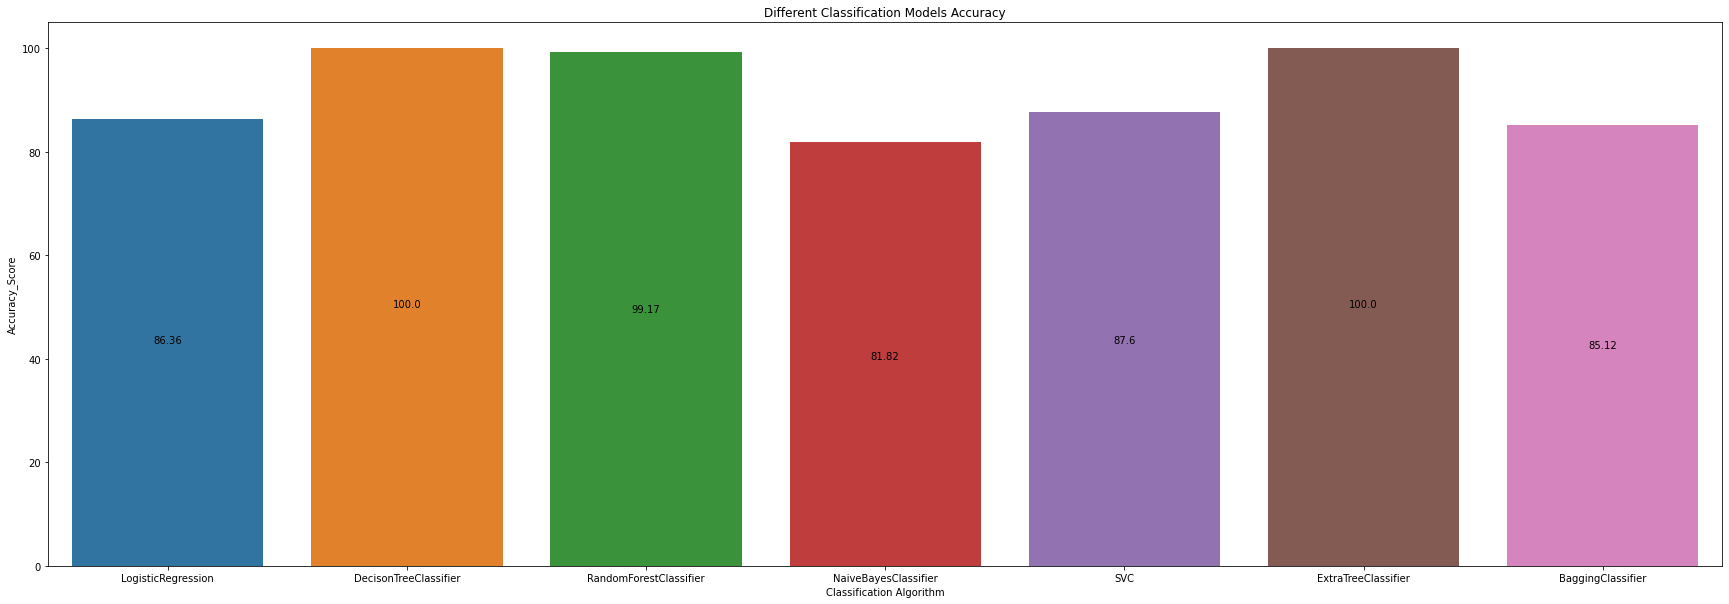

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
x= ['LogisticRegression','DecisonTreeClassifier','RandomForestClassifier','NaiveBayesClassifier','SVC','ExtraTreeClassifier','BaggingClassifier']
y=  [LR,DTC,RF,NB,SV,ETC,BC]
plt.figure(figsize = (30,10))
sns.barplot(x,y)

# calling the function to add value labels
addlabels(x, y)

# Add labels to your graph
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy_Score')
plt.title("Different Classification Models Accuracy")

#plt.legend()
plt.show()

# Project Outcomes & Conclusion

Observation: Decision Tree Classifier and Extra Tree Classifier have the best accuracy

Observation from the count plot of the categorical data 
Sex: males have a high risk of getting heart disease than the female 
Fasting blood sugar:People have no fasting blood suger rate have a high risk of getting heart disease 
Chest pain: Chest pain type 0 have the highest number and chest pain type 3 have the lowest number compared to other chest pain types 
Exercise induced angina: People who have no exercise-induced angina pectoris have a very high rate of getting heart disease. resting electrocardio results: People who have a electro cardio result of 0 have a high risk of getting heart disease thal: People who have thal value '2' have high risk of getting heart disease

54.5% of the people are diseased while 45.5 % of the people are healthy.
